In [ ]:
!gdown https://drive.google.com/uc?id=1EcJVgzHaFFAveFJ2Tz_fHtMwTTki1fMV

Downloading...
From: https://drive.google.com/uc?id=1EcJVgzHaFFAveFJ2Tz_fHtMwTTki1fMV
To: /content/drugLib_raw.zip
100% 1.13M/1.13M [00:00<00:00, 119MB/s]


In [ ]:
!unzip drugLib_raw.zip

Archive:  drugLib_raw.zip
replace drugLibTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace drugLibTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drugLibTest_raw.tsv     
  inflating: drugLibTrain_raw.tsv    


In [97]:
import pandas as pd
import numpy as np
df_train = pd.read_csv("drugLibTrain_raw.tsv",sep='\t', index_col=[0])
df_test = pd.read_csv("drugLibTest_raw.tsv",sep='\t', index_col=[0])
df = pd.concat([df_train, df_test])
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4143 entries, 2202 to 729
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        4143 non-null   object
 1   rating             4143 non-null   int64 
 2   effectiveness      4143 non-null   object
 3   sideEffects        4143 non-null   object
 4   condition          4142 non-null   object
 5   benefitsReview     4143 non-null   object
 6   sideEffectsReview  4141 non-null   object
 7   commentsReview     4135 non-null   object
dtypes: int64(1), object(7)
memory usage: 291.3+ KB


In [99]:
df = df.fillna(".")

In [100]:
df.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition',
       'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [101]:
df.nunique()

urlDrugName           541
rating                 10
effectiveness           5
sideEffects             5
condition            1808
benefitsReview       4028
sideEffectsReview    3747
commentsReview       4056
dtype: int64

In [102]:
df["sideEffects"].value_counts()

Mild Side Effects                1349
No Side Effects                  1198
Moderate Side Effects             850
Severe Side Effects               491
Extremely Severe Side Effects     255
Name: sideEffects, dtype: int64

In [103]:
df["rating"].value_counts()

10    968
8     748
9     613
7     471
1     420
5     226
6     215
3     195
4     151
2     136
Name: rating, dtype: int64

In [104]:
df["effectiveness"].value_counts()

Highly Effective          1741
Considerably Effective    1238
Moderately Effective       572
Ineffective                329
Marginally Effective       263
Name: effectiveness, dtype: int64

Se hará un modelo de clasificación basado en los reviews de Side Effects para predecir la categoría de Side Effects

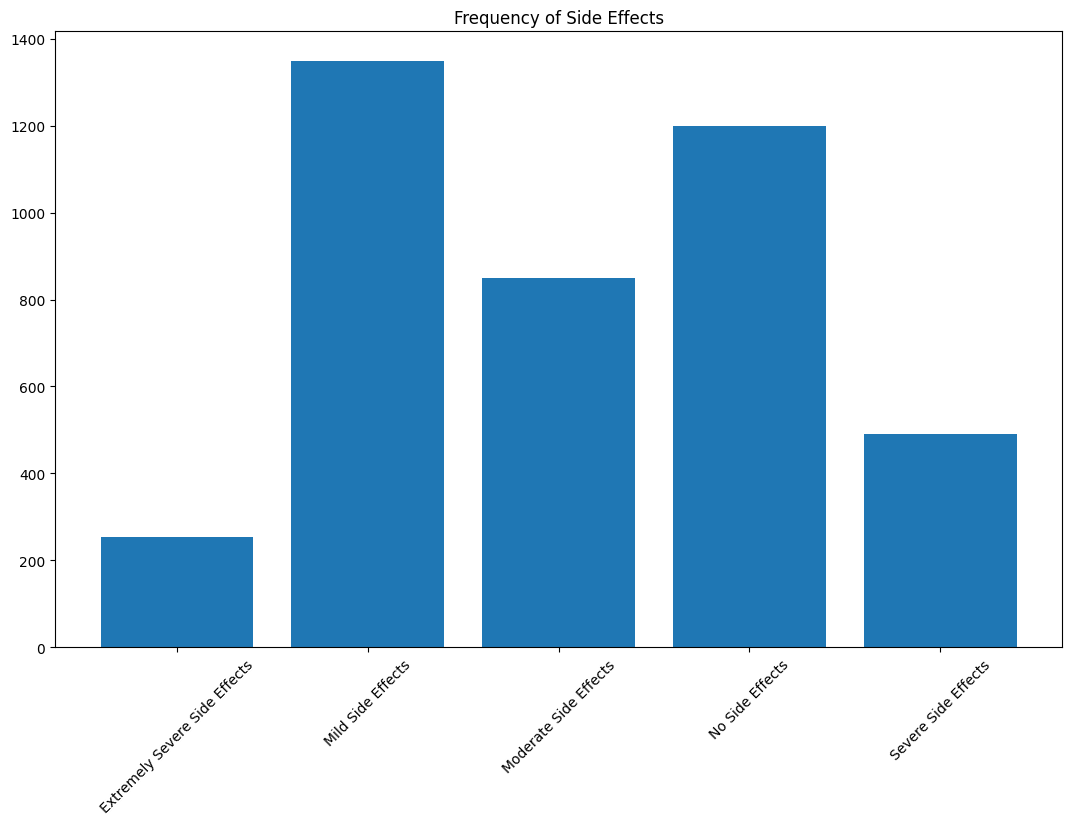

In [133]:
import matplotlib.pyplot as plt

side_effects = df["sideEffects"].value_counts().sort_index()
labels = side_effects.index.tolist()

plt.figure(figsize=(13,8))
plt.bar(range(len(side_effects)), side_effects.values)
plt.xticks(range(len(side_effects)), labels, rotation=45)
plt.title("Frequency of Side Effects")
plt.show()

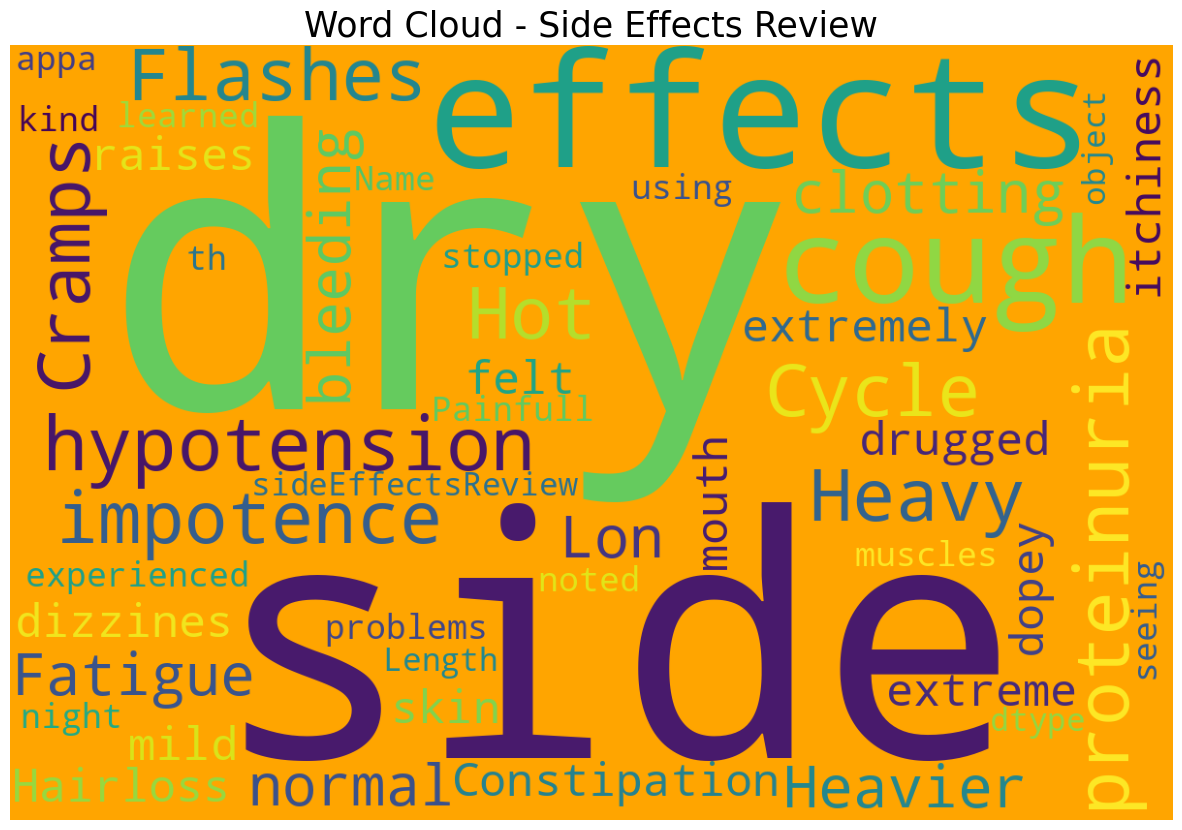

In [106]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# definimos una lista de stopwords
stopwords = set(STOPWORDS)

# creamos el objeto WordCloud y le pasamos los parámetros para personalizar la nube de palabras
wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(df['sideEffectsReview']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Side Effects Review', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [107]:
X = df["sideEffectsReview"]
y = df["sideEffects"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [108]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# crea una instancia de WordNetLemmatizer y una lista de stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower()) # texto a minúsculas
    # tokeniza el texto y lematiza cada palabra eliminando los stopwords
    lemmas = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words] 
    return ' '.join(lemmas) # 

# convierte en una matriz de término-frecuencia inversa de documento (TF-IDF)
tfidf = TfidfVectorizer(preprocessor=preprocess_text)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


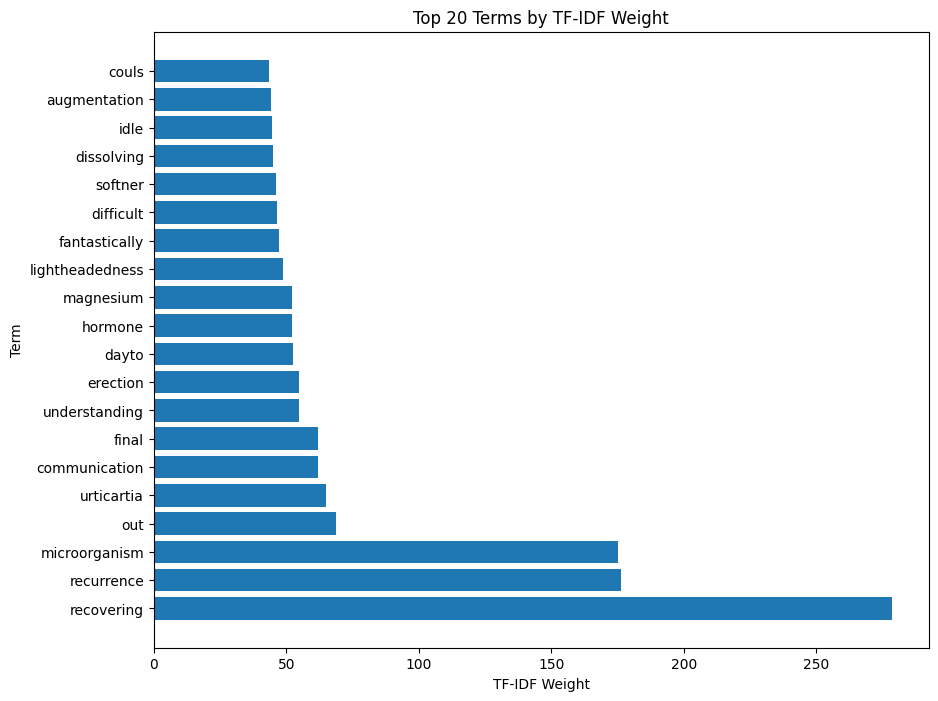

In [109]:
terms = tfidf.vocabulary_.keys()
weights = X_train_tfidf.sum(axis=0).A1

# ordenamos los términos por peso TF-IDF
sorted_indices = weights.argsort()[::-1]

# 20 términos con mayor peso TF-IDF
top_k = 20
top_terms = [list(terms)[i] for i in sorted_indices[:top_k]]
top_weights = weights[sorted_indices][:top_k]

plt.figure(figsize=(10, 8))
plt.barh(top_terms, top_weights)
plt.title("Top 20 Terms by TF-IDF Weight")
plt.xlabel("TF-IDF Weight")
plt.ylabel("Term")
plt.show()

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.40      0.20      0.26        51
            Mild Side Effects       0.51      0.67      0.58       270
        Moderate Side Effects       0.39      0.36      0.38       170
              No Side Effects       0.81      0.76      0.79       240
          Severe Side Effects       0.46      0.31      0.37        98

                     accuracy                           0.56       829
                    macro avg       0.51      0.46      0.47       829
                 weighted avg       0.56      0.56      0.55       829



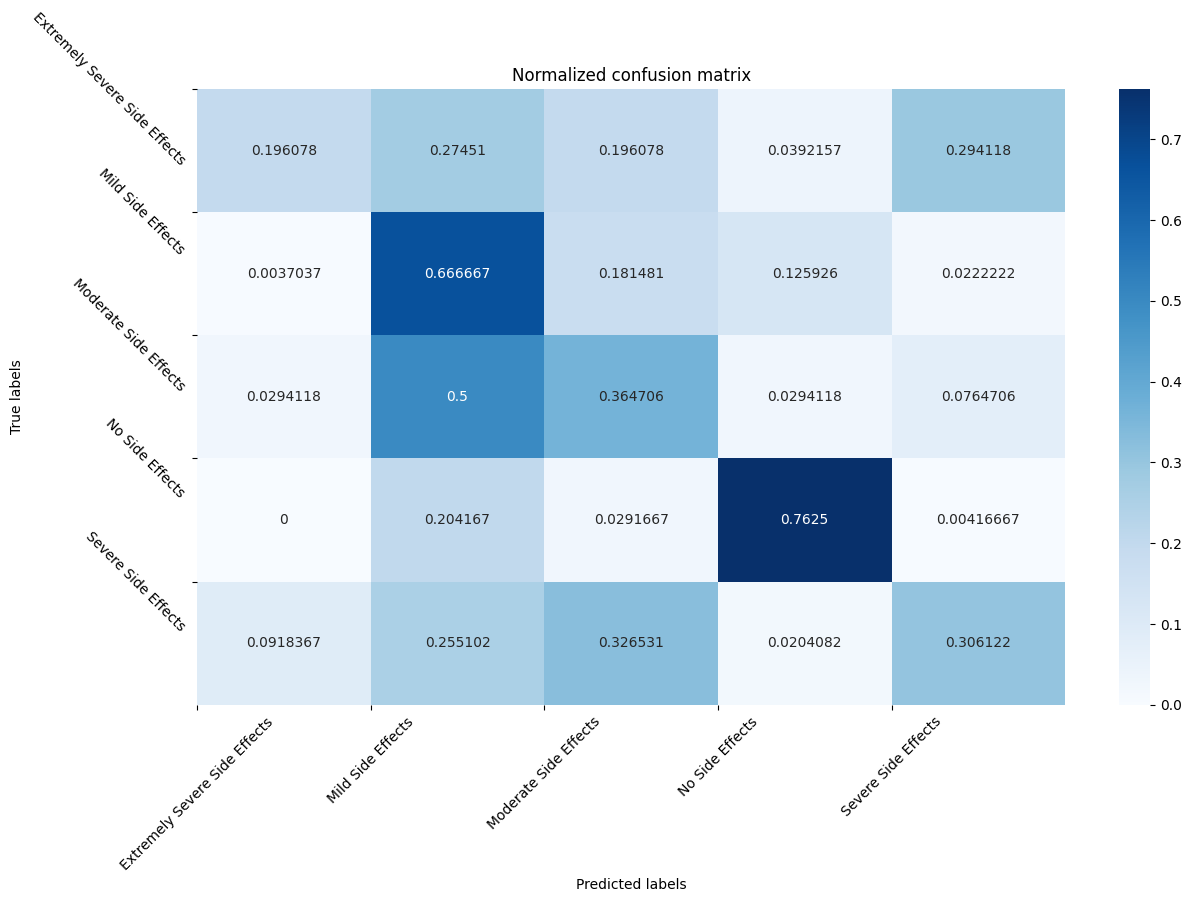

In [131]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_classifier = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
svm_classifier = grid_search.best_estimator_

y_pred = svm_classifier.predict(X_test_tfidf)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
print(classification_report(y_test, y_pred, zero_division=0))
plt.figure(figsize=(14,8))
sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized confusion matrix')

classes = np.sort(df["sideEffects"].unique())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation = -45)
        
plt.show()

La Matriz de Confusión refleja un bajo rendimiento para los Severe Side Effects y los Extremely Severe Side Effects. La frecuencia es muy baja para estos efectos secundarios en comparación con otros.

Funcionó bien con los Mild Side Effects y No Side Effects, ya que sus frecuencias son altas.

In [111]:
import pickle
model_file = "ModeloSVM_SentimentAnalysis.pkl"
with open(model_file, "wb") as file:
  pickle.dump(svm_classifier, file)